In [1]:
#import libraries
from PIL import Image, ImageDraw, ImageFont
import random
import matplotlib.pyplot as plt

In [2]:
# Set the size of the image
img_size = (20, 20)

In [3]:
# Prepare a function to create a handwritten-style number
def create_handwritten_digit(digit):
    # Create a blank image with white background
    img = Image.new('L', img_size, color=255)
    draw = ImageDraw.Draw(img)

    # Use a basic font
    font_size = random.randint(14, 18)  # Randomize font size
    font = ImageFont.load_default()

    # Randomize position a bit to make it look hand-written
    position = (random.randint(0, 5), random.randint(-3, 3))

    # Draw the digit
    draw.text(position, str(digit), fill=0, font=font)

    return img

In [4]:
# Create 10 different images for each digit
handwritten_digits = {digit: [create_handwritten_digit(digit) for _ in range(10)] for digit in range(10)}

In [5]:
# Function to create a test image of a handwritten digit
def create_test_handwritten_digit():
    # Randomly select a digit
    digit = random.randint(0, 9)

    # Reusing the same function for creating a digit image
    return create_handwritten_digit(digit)

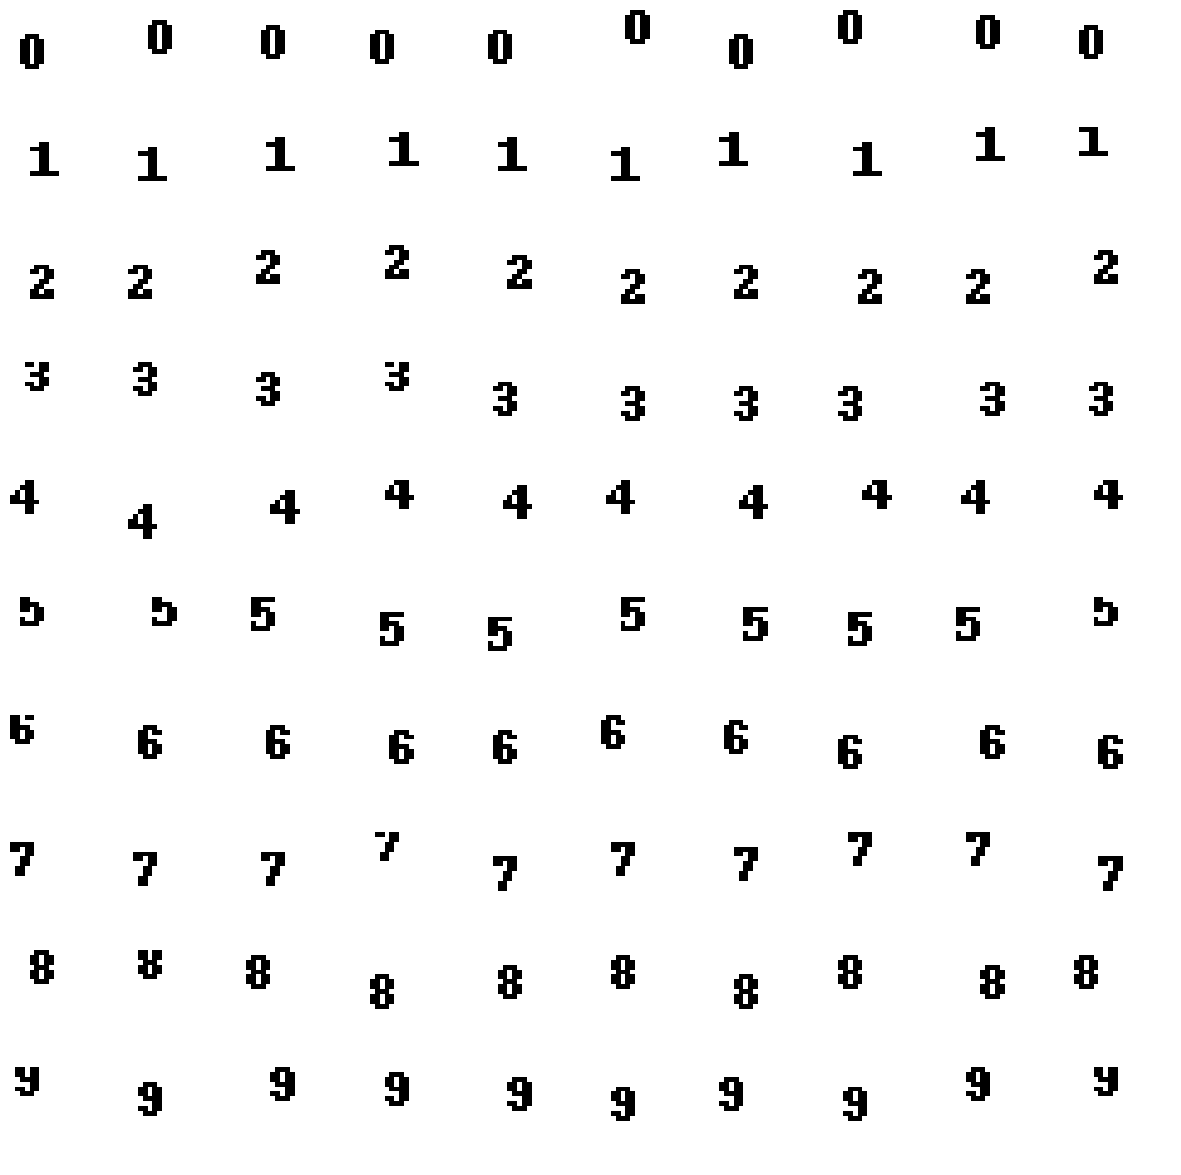

In [6]:
# Generate a set of test images
num_test_images = 50
test_handwritten_digits = [create_test_handwritten_digit() for _ in range(num_test_images)]

# For demonstration purposes, display some of the created training images
plt.figure(figsize=(15, 15))
for digit in handwritten_digits:
    for i in range(10):
        plt.subplot(10, 10, digit * 10 + i + 1)
        plt.imshow(handwritten_digits[digit][i], cmap='gray')
        plt.axis('off')
plt.show()

In [7]:
#Import libraries
import numpy as np

In [8]:
class Perceptron:
    def __init__(self, input_size, activation_function="sigmoid"):
        self.input_size = input_size
        self.weights = np.random.randn(input_size)
        self.bias = np.random.randn()
        self.activation_function = activation_function

    def initialize_parameters(self):
        self.weights = np.random.randn(self.input_size)
        self.bias = 0 #np.random.randn()

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def activation(self, x):
        if self.activation_function == "sigmoid":
            return self.sigmoid(x)
        else:
            raise NotImplementedError("Activation function not implemented.")

    def activation_derivative(self, x):
        if self.activation_function == "sigmoid":
            return self.sigmoid_derivative(x)
        else:
            raise NotImplementedError("Activation function derivative not implemented.")

    def forward_propagation(self, inputs):
        weighted_sum = np.dot(inputs, self.weights) + self.bias
        output = self.activation(weighted_sum)
        return output

    def calculate_loss(self, predicted, target):
        # Mean Squared Error (MSE) loss
        return np.mean((predicted - target) ** 2)

    def calculate_gradient(self, inputs, output, target):
        error = target - output
        gradient = self.activation_derivative(output)
        delta = error * gradient
        d_weights = np.dot(inputs.T, delta)
        d_bias = np.sum(delta)
        return d_weights, d_bias

    def update_parameters(self, d_weights, d_bias, learning_rate):
        self.weights += learning_rate * d_weights
        self.bias += learning_rate * d_bias

    def train(self, inputs, targets, epochs=1000, learning_rate=0.1):
        for epoch in range(epochs):
            total_loss = 0

            for input_data, target in zip(inputs, targets):
                # Forward propagation
                output = self.forward_propagation(input_data)

                # Calculate loss
                loss = self.calculate_loss(output, target)
                total_loss += loss

                # Backward propagation
                d_weights, d_bias = self.calculate_gradient(input_data, output, target)
                self.update_parameters(d_weights, d_bias, learning_rate)

            # Print average loss for each epoch
            if epoch % 5 == 0:
                average_loss = total_loss / len(inputs)
                print(f"Epoch {epoch}: Average Loss = {average_loss}")


In [9]:
# Example of using the Perceptron
input_size = 400  # 20x20 image flattened
perceptron = Perceptron(input_size)
# Initialize the parameters
perceptron.initialize_parameters()

# Check the initialized parameters
print("Initialized weights shape:", perceptron.weights.shape)
print("Initialized bias:", perceptron.bias)

Initialized weights shape: (400,)
Initialized bias: 0


In [10]:
from sklearn.linear_model import Perceptron

# Assuming 'handwritten_digits' is a dictionary with digits as keys and lists of images as values
# Convert the images to numpy arrays and flatten them
X_train = np.array([np.array(img).flatten() for digit in handwritten_digits for img in handwritten_digits[digit]])
y_train = np.array([digit for digit in handwritten_digits for _ in handwritten_digits[digit]])

# Initialize the Perceptron
perceptron = Perceptron()

# Train the Perceptron using the 'fit' method
perceptron.fit(X_train, y_train)

# Assuming 'test_handwritten_digits' is a list of images to be tested
# Test data preparation
X_test = np.array([np.array(img).flatten() for img in test_handwritten_digits])

# Make predictions using the 'predict' method
predictions = perceptron.predict(X_test)

# Display predictions
print("Predictions:", predictions)

Predictions: [5 5 5 5 6 5 5 5 5 6 5 5 6 5 8 5 5 5 5 5 5 5 5 5 8 5 6 5 5 5 5 5 5 6 5 5 5
 5 5 5 6 5 5 5 5 5 6 5 6 6]
